# 2022年全国大学生数学建模竞赛本科组北太天元数模之星获奖团队队长韩奥麟同学数学建模笔记

**Copyright©**
1. 版权归山东大学韩奥麟同学所有；
2. 未经原作者允许不得转载本文内容，否则将视为侵权，侵权必究。
3. 转载请注明来源及原作者。

# 一、整数规划与非线性规划
## 1. 整数规划
### 1.1 整数变量，cvxpy
求解下列整数线性规划问题:

$$
\begin{array}{ll}
\min & z=40 x_{1}+90 x_{2}, \\
\text { s.t. } & \left\{\begin{array}{l}
9 x_{1}+7 x_{2} \leqslant 56, \\
7 x_{1}+20 x_{2} \geqslant 70, \\
x_{1}, x_{2} \geqslant 0 \text { 为整数. }
\end{array}\right.
\end{array}

$$


In [3]:
import numpy as np
import cvxpy as cp

c = np.array([40, 90])
a = np.array([[9, 7], [-7, -20]])
b = np.array([56, -70])
x = cp.Variable(2, integer=True)
obj = cp.Minimize(c@x)
cons = [a@x <= b, x >= 0]
prob = cp.Problem(obj, cons)
prob.solve(solver="GUROBI")
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

# Use '*' for matrix-scalar and vector-scalar multiplication.
# Use '@' for matrix-matrix and matrix-vector multiplication.
# Use 'multiply' for elementwise multiplication.

最优值为： 350.0
最优解为：
 [2. 3.]


### 1.2 标准指派问题，cvxpy

标准指派问题的一般提法是: 拟分派$n$个人$A_1, A_2, \cdots, A_n$去完成$n$项工作$B_1, B_2, \cdots, B_n$, 要求每项工作需且仅需一个人去完成, 每个人需完成且仅需完成一项工作. 已知$A_i$完成工作$B_j$的时间或费用等成本型指标值为$c_{i j}$, 则应如何指派 才能使总的工作效率最高?

引入$0-1$决策变量
$$
x_{i j}=\left\{\begin{array}{ll}
1, & \text { 指派 } A_i \text { 去完成工作 } B_j, \\
0, & \text { 否则 },
\end{array} \quad i, j=1,2, \cdots, n .\right.
$$
则标准指派问题的数学模型为
   
$$
\begin{aligned}
&\min z=\sum_{i=1}^{5} \sum_{j=1}^{5} c_{i j} x_{i j} \text {, }\\
&\text { s.t. }\left\{\begin{array}{l}
\sum_{j=1}^{5} x_{i j}=1, \quad i=1,2, \cdots, 5, \\
\sum_{i=1}^{5} x_{i j}=1, \quad j=1,2, \cdots, 5, \\
x_{i j}=0 \text { 或 } 1, \quad i,j=1,2, \cdots, 5,
\end{array}\right.
\end{aligned}
$$

注:$\quad \left(c_{ij}\right)_{n*n}\text{为效率矩阵}, c_{ij} \geqslant 0, \min$; 匈牙利算法, 多项式时间算法;

In [2]:
import numpy as np
import cvxpy as cp


c = np.array([[4, 8, 7, 15, 12],
              [7, 9, 17, 14, 10],
              [6, 9, 12, 8, 7],
              [6, 7, 14, 6, 10],
              [6, 9, 12, 10, 6]])
x = cp.Variable((5, 5), integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c, x)))
cons = [0 <= x, x <= 1, cp.sum(x, axis=0, keepdims=False) == 1, cp.sum(x, axis=1, keepdims=False) == 1]
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

Restricted license - for non-production use only - expires 2024-10-28
最优值为： 34.0
最优解为：
 [[ 0. -0.  1. -0. -0.]
 [ 0.  1. -0. -0. -0.]
 [ 1. -0. -0. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]


### 1.3 广义指派问题，cvxpy
广义指派问题常见为以下四类, 通常做法是转化为标准指派问题, 然后用匈牙利算法求解.
**(1)最大化指派问题**
一些指派问题中, 每人完成各项工作的效率可能是诸如利润、业绩等效益型指标, 此时则以总的工作效率最大为目标函数, 即
$$
\max z=\sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j} .
$$
对于最大化指派问题, 若令 $M=\max _{1 \leqslant i, j \leqslant n}\left\{c_{i j}\right\}$, 再考虑到约束条件 $\sum_{i=1}^n \sum_{j=1}^n x_{i j}=$ $n$, 则有
$$
\begin{aligned}
\min \sum_{i=1}^n \sum_{j=1}^n\left(M-c_{i j}\right) x_{i j} & =\min \left(\sum_{i=1}^n \sum_{j=1}^n M x_{i j}-\sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j}\right) \\
& =n M-\max \sum_{i=1}^n \sum_{j=1}^n c_{i j} x_{i j} .
\end{aligned}
$$
于是, 以 $\boldsymbol{C}=\left(c_{i j}\right)_{n \times n}$ 为效率矩阵的最大化指派问题, 就可转化为以 $\left(M-c_{i j}\right)_{n \times n}$ 为效率矩阵的标准指派问题.
**(2)人数和任务数不等的指派问题**
一些指派问题中, 可能出现人数和任务数不相等的情况. 对于这样的指派问题, 通常的处理方式为：若人数少于任务数, 则可添加一些虚拟的 “人”. 这些虚拟的人完成各项任务的效率取为 0 , 理解为这些效率值实际上不会发生. 若人数多于任务数, 则可添加一些虚拟的 “任务”. 这些虚拟的任务被每个人完成的效率同样也取为 0 .
**(3)一个人可完成多项任务的指派问题**
一些指派问题中, 可能出现要求某人完成几项任务的情形. 对于这样的指派问题, 可将该人看作相同的几个人来接受指派, 只需令其完成同一项任务的效率都一样即可.
**(4)某项任务一定不能由某人完成的指派问题**
一些指派问题中, 可能出现某人不能完成某项任务的情形. 对于这样的指派问题, 只需将相应的效率值 (成本型) 取成足够大的数(eg. numpy.inf)即可.

注：如果用匈牙利算法**手工**求解指派问题, **需要**把广义指派问题转化为标准的指派问题; 如果使用**软件**求解各种广义指派问题, 只要直接建立0-1整数规划模型, **不需要**把广义指派问题化成标准的指派问题。

$$
\begin{array}{ll}
\max z_{1}=\sum_{j=1}^{7} l_{j}\left(x_{1 j}+x_{2 j}\right), \\
\text { s.t. } 
\begin{cases}\sum_{i=1}^{2} x_{i j} \leqslant a_{j}, & j=1,2, \cdots, 7, \\
\sum_{j=1}^{7} l_{j} x_{i j} \leqslant 1020, & i=1,2, \\
\sum_{j=1}^{7} w_{j} x_{i j} \leqslant 40000, & \\
\sum_{j=5}^{7} l_{j}\left(x_{1 j}+x_{2 j}\right) \leqslant 302.7, & \\
x_{i j} \geqslant 0 \text { 且为整数, }
\end{cases}
\end{array}
$$

In [2]:
import numpy as np
import cvxpy as cp


L = np.array([48.7, 52.0, 61.3, 72.0, 48.7, 52.0, 64.0])
x = cp.Variable((2, 7), integer=True)
a = np.array([8, 7, 9, 6, 6, 4, 8])
w = np.array([2000, 3000, 1000, 500, 4000, 2000, 1000])
obj = cp.Maximize(cp.sum(x@L))
cons = [cp.sum(x, axis=0, keepdims=False) <= a,
       x@L <= [1020, 1020],
       x@w <= 40000,
       cp.sum(x[:, 4:]@L[4:]) <= 302.7,
       x >= 0]
prob = cp.Problem(obj, cons)
prob.solve(solver='GLPK_MI') #需要安装gurobi. 如未安装, 将'GUROBI'换成'GLPK_MI'.
print("最优值为：", prob.value)
print("最优解为：\n", x.value)


最优值为： 2039.4
最优解为：
 [[4. 1. 5. 3. 3. 2. 0.]
 [4. 6. 4. 3. 0. 1. 0.]]


### 1.4 整数规划习题
#### 1.4.1 销售代理点售书
一家出版社准备在某市建立两个销售代理点, 向7个区的大学生售书, 每个区的大学生数量 (单位: 千人) 表示在下图上. 每个销售代理点只能向本区和一个相邻区的大学生售书, 这两个销售代理点应该建在何处, 才能使所能供应的大学生的数量最大? 建立该问题的整数线性规划模型并求解.
![](./images/销售点售书.png)

解: 将大学生数量为$34,29,42,21,56,18,71$的区分别标号为$1,2,3,4,5,6,7$区, 划出区与区之间的相邻关系图:
![](./images/销售解答.png)

##### 模型建立

首先将区域标号1,2,3,4,5,6,7分别代表人数为34,29,42,21,56,18,71的区域。用$ r_i $表示第$ i $个区大学生的数量。

用$ a_{ij} $表示第$ i $个区和第$j$个区是否相邻：

$a_{i,j} =1$表示i小区和j小区相邻, i,j=1..7,j>i

$a_{i,j} =0$表示i小区和j小区不相邻, i,j=1..7,j>i


用$ x_{ij} $表示是否选择向第$ i $个区和第$ j $个区的大学生售书，

$ x_{ij}=1 $，向第i个和第j个区的大学生同时售书，$ x_{ij}=0 $，不向第i个和第j个区的大学生售书，其中$ i=1,\cdots,7,j=1,\cdots,7$。


目标函数：
 $
 \max = {\sum_{i=1}^{7}\sum_{j=i+1}^{7}{(r_i + r_j)}x_{ij}}
$

约束条件1：相邻才能被选中
$x_{ij}\le a_{ij}$

约束条件2 :
排除特殊情况：

$x_{1,2} = 1,x_{1,3} = 1$,
$x_{1,3} = 1,x_{3,4} = 1$

$
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7
$

约束条件3：总共有两对代理点被选中,考虑到对称性，累计求和应该是2。

$\sum_{i=1}^{7}\sum_{j=i+1}^{7}{x_{ij}=2}$

联合目标函数和约束条件在一起，我们得到如下模型：
$
\begin{array}
\max \max= \sum_{i=1}^{7} \sum_{j=1}^{7} (r_i + r_j) x_{ij}\\
\text{s.t.}
\begin{cases}
x_{ij}=0, 1,i=1,\cdots,7,j=i+1,\cdots,7  \\
x_{ij}\le a_{ij} \\
\sum_{i=1}^{7}{x_{ij} + x_{ji}\le1}, j=1,\cdots,7\\
 \sum_{i=1}^{7}\sum_{j=1}^{7}{x_{ij}=2}
\end{cases}
\end{array}
$

In [10]:
"""
社区设置销售中心问题
"""
# 用gurobi求解
import gurobipy as gp
from gurobipy import GRB

try:

	n = 7  # 7个社区

	# 社区的大学生人数
	r= [34, 29, 42, 21, 56, 18, 71]
	# 社区的相邻关系
	a = [[0,1,1,0,0,0,0],
		[1,0,1,1,1,0,0],
		[1,1,0,1,0,0,0],
		[0,1,1,0,1,1,1],
		[0,1,0,1,0,1,0],
		[0,0,0,1,1,0,1],
		[0,0,0,1,0,1,0]]


	# 建立模型
	model = gp.Model("district")

	# 变量设定
	# x(i,j) 表示(i,j)是否同时被选中
	x = model.addVars(n,n, vtype=GRB.BINARY, name='x')


	# 设置目标函数
	links = [(i,j) for i in range(n) for j in range(n)]
	obj = gp.quicksum((r[i]+r[j])*x[i,j]/2 for (i,j) in links)
	model.setObjective(obj, GRB.MAXIMIZE)

	#总数2对的约束
	model.addConstr(gp.quicksum(x[i,j] for (i,j) in links)==4)

	#约束条件：相邻才能被选中
	for (i,j) in links:
		model.addConstr(x[i,j]<=a[i][j])

	# x(i,j) = x(j,i)
	for (i,j) in links:
		model.addConstr(x[i,j]==x[j,i])

	# 约束条件 : 每一个社区只能选中一个相邻的小区
	for i in range(n):
		model.addConstr(gp.quicksum(x[i,j] for j in range(n))<=1)

	# 约束条件 : 每一个社区只能选中一个相邻的小区
	for j in range(n):
		model.addConstr(gp.quicksum(x[i,j] for i in range(n))<=1)


	model.optimize()

	print('目标函数值: %g' % model.objVal)
	for i in range(n):
		for j in range(i+1,n):
			if x[i,j].x>0:
				print('x[%d][%d]=%d'%(i,j,x[i,j].x),end=',')
				print('r[%d] =%d, r[%d]=%d' %(i,r[i],j,r[j]))


except gp.GurobiError as e:
	print('Error code ' + str(e.errno) + ": " + str(e))

except AttributeError:
	print('Encountered an attribute error')

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: AMD Ryzen 5 5600H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 113 rows, 49 columns and 280 nonzeros
Model fingerprint: 0xa3891911
Variable types: 0 continuous, 49 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 153.0000000
Presolve removed 105 rows and 40 columns
Presolve time: 0.00s
Presolved: 8 rows, 9 columns, 27 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)
Found heuristic solution: objective 166.0000000

Root relaxation: objective 1.770000e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     


该代码的结果:

目标函数值: 177

x[1][4]=1,r[1] =29, r[4]=56

x[3][6]=1,r[3] =21, r[6]=71


In [11]:
# 用cvxpy求解
import numpy as np
import cvxpy as cp


n = 7

# 社区的大学生人数
r= [34, 29, 42, 21, 56, 18, 71]

# 社区的相邻关系a_{ij} 注意：i>=j时，a_{ij}=0
a =np.array([[0,1,1,0,0,0,0],
             [0,0,1,1,1,0,0],
             [0,0,0,1,0,0,0],
             [0,0,0,0,1,1,1],
             [0,0,0,0,0,1,0],
             [0,0,0,0,0,0,1],
             [0,0,0,0,0,0,0]])

# 表示出目标函数系数r_i + r_j
s = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        s[i][j] = r[i] + r[j]
# 另一种方式
s1 = np.array([[ri + rj for ri in r] for rj in r])

# 决策变量
x = cp.Variable((n, n), boolean=True)

# 目标函数
obj = cp.Maximize(cp.sum(cp.multiply(s, x)))

# 全体约束条件
constraints = []

# 约束条件1：相邻才能被选中
con1 = x<=a
constraints.append(con1)

# 约束条件2：总共有两对代理点被选中,考虑到对称性，累计求和应该是2
con2 = cp.sum(x)==2
constraints.append(con2)

# 约束条件3：排除特殊情况
con3 = cp.sum(x, axis=1, keepdims=False) + cp.sum(x, axis=0, keepdims=False) <= 1 # 体会keepdims = False的妙用
constraints.append(con3)

## 约束条件3：排除特殊情况另一种写法
# for i in range(n):
#     con = cp.sum([x[k][i]+x[i][k] for k in range(n)]) <= 1 
#     constraints.append(con)

# 构建模型
prob = cp.Problem(obj, constraints)

# 求解模型
prob.solve()
print("最优值为：", prob.value)


print("具体结果")
for i in range(n):
    for j in range(n):
        if x.value[i, j]>0:
            print(i+1, j+1, x.value[i, j], s[i, j])
            

最优值为： 177.0
具体结果
2 5 1.0 85.0
4 7 1.0 92.0


#### 1.4.2 面试问题
有4名同学到一家公司参加三个阶段的面试. 公司要求每个同学都必须首先找公司秘书初试, 然后到部门主管处复试, 最后到经理处参加面试, 并且不允许揷队(即在任何一个阶段4名同学的顺序是一样的). 由于4名同学的专业背景不同, 所以每人在三个阶段的面试时间也不同, 如下表所示 (单位:$\min$):
\begin{array}{|c|c|c|c|}
\hline & \text{秘书初试} & \text{主管复试} & \text{经理面试} \\
\hline \text{同学甲} & 13 & 15 & 20 \\
\hline \text{同学乙} & 10 & 20 & 18 \\
\hline \text{同学丙} & 20 & 16 & 10 \\
\hline \text{同学丁} & 8 & 10 & 15 \\
\hline
\end{array}
这4名同学约定他们全部面试完以后一起离开公司. 假定现在时间是早$8: 00$, 问他们最早何时能离开公司?

**四个关键点：**\
（1）不同阶段的先后关系如何表示？\
（2）同一阶段的先后关系如何表示？\
（3）互斥条件如何实现？\
（4）目标函数如何表达？

$T$表示需要的时间, $s_{ij}$表示$i$同学$j$阶段开始的时间, $e_{ij}$表示$i$同学$j$阶段结束的时间, $t_{ij}$表示$i$同学$j$阶段面试的时间, 建立如下整数线性规划模型:
$$
\begin{aligned}
&\min T\\
&\text { s.t. }\left\{\begin{array}{l}
e_{i,3} \leqslant T, \quad i=1,2,3,4\\
e_{i,j} = s_{i,j} + t_{i,j}, \quad i=1,2,3,4,\ j=1,2,3\\
e_{i,j} \leqslant s_{i,j+1}, \quad i=1,2,3,4, \ j=1,2\\
e_{i,j} \leqslant s_{k,j}+\left(1-x_{i, k}\right) M, \quad j=1,2,3, \ i=1,2,3,4, \ k=1,2,3,4\\
e_{k,j} \leqslant s_{i,j}+x_{i,k} M, \quad j=1,2,3, \ i=1,2,3,4, \ k=1,2,3,4\\
x_{i,j} \in \{0,1\}, \quad i=1,2,3,4, \ j=1,2,3\\
e_{i,j}, s_{i,j} \text{为非负整数},\quad i=1,2,3,4, \ j=1,2,3\\
M\text{为充分大的数}
\end{array}\right.
\end{aligned}
$$

In [ ]:
import numpy as np
import cvxpy as cp


# 常量
m = 4 # 四名同学
n = 3 # 三个阶段

# 不同阶段面试时间
t = np.array([[13, 15, 20],
              [10, 20, 18],
              [20, 16, 10],
              [8, 10,15]])

# 决策变量
# s(i, j) 表示i同学j阶段面试的开始时刻
s = cp.Variable((m, n), pos=True)

# e(i, j) 表示i同学j阶段面试的开始时刻
e = cp.Variable((m, n), pos=True)

# x(i, k)表示i同学在j同学前面
x = cp.Variable((m, m), boolean=True)

T = cp.Variable(1, pos=True)

# 目标函数
obj = cp.Minimize(T)

# 约束条件
constraints = []

# 约束条件 e(i, 3)<=T
for i in range(m):
    constraints.append(e[i, n-1] <= T)

# 等式条件
constraints.append(e == s + t)
# for i in range(m):
#     for j in range(n):
#         constraints.append(e[i, j] == s[i, j] + t[i][j])

# 同一个同学在不同阶段的时间先后关系
for i in range(m):
    for j in range(n-1):
        constraints.append(e[i, j] <= s[i, j+1])

# 互斥约束
M = 800 # 充分大的数不能用np.inf代替
for j in range(n):
    for i in range(m):
        for k in range(i+1, m):
            constraints.append(e[i, j] <= s[k, j] + (1-x[i, k])*M)
            constraints.append(e[k, j] <= s[i, j] + x[i, k]*M)

# 建立模型并求解
prob = cp.Problem(obj, constraints)
prob.solve()
print("最优值为：", prob.value)

for i in range(m):
    for k in range(i+1, m):
        print('x[%d][%d]=%d'%(i, k, x[i,k].value))


最优值为： 84.0
x[0][1]=1
x[0][2]=1
x[0][3]=0
x[1][2]=1
x[1][3]=0
x[2][3]=0


## 2. 非线性规划
（1）一般地，非线性规划难以求得全局最优解

（2）非线性优化容易求得局部最优解，与初值有很大关系。初值不同，所得局部最优解可能不同。**所以，尽量建立线性模型，避免非线性模型。**

（3）凸优化中，局部最优等价于全局最优。
### 2.1 用scipy.optimize模块的minimize求解
   **scipy.optimize中没有maximize，所以max模型要转化成min模型。**
Example1:
$$
\begin{array}{ll}
\min & \frac{2+x_{1}}{1+x_{2}}-3 x_{1}+4 x_{3} \\
\text { s.t. } & 0.1 \leqslant x_{i} \leqslant 0.9, \quad i=1,2,3
\end{array}
$$

In [12]:
from scipy.optimize import minimize
import numpy as np


def obj(x):
    x1, x2, x3 = x
    return (2+x1)/(1+x2) -3*x1 + 4*x3
LB = [0.1]*3
UB = [0.9]*3
bound = tuple(zip(LB, UB))
res = minimize(obj, np.ones(3), bounds=bound) #第二个参数为初值
print(res.fun, '\n', res.success, '\n', res.x) #输出最优值，求解状态，最优解

-0.7736842105263159 
 True 
 [0.9 0.9 0.1]


Example2:
$$
\begin{array}{ll}
\max & z=x_{1}^{2}+x_{2}^{2}+3 x_{3}^{2}+4 x_{4}^{2}+2 x_{5}^{2}-8 x_{1}-2 x_{2}-3 x_{3}-x_{4}-2 x_{5}, \\
\text { s.t. } \quad & \left\{\begin{array}{l}
x_{1}+x_{2}+x_{3}+x_{4}+x_{5} \leqslant 400 \\
x_{1}+2 x_{2}+2 x_{3}+x_{4}+6 x_{5} \leqslant 800 \\
2 x_{1}+x_{2}+6 x_{3} \leqslant 200 \\
x_{3}+x_{4}+5 x_{5} \leqslant 200 \\
0 \leqslant x_{i} \leqslant 99, \quad i=1,2, \cdots, 5 .
\end{array}\right.
\end{array}
$$

In [ ]:
# 该题只能求得局部最优解，求解时多取几个初值试试
from scipy.optimize import minimize
import numpy as np


c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
obj = lambda x: np.dot(-c1, x**2) + np.dot(-c2, x) #目标函数也可通过def定义
A = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])
cons = {'type': 'ineq', 'fun': lambda x:b-A@x}
# 多个限制条件 cons=[{'type': 'ineq', 'fun': lambda x:b1-A1@x'}, {'type': 'ineq', 'fun': lambda x:b1-A1@x''}]
bound = [(0, 99) for i in range(A.shape[1])]
res = minimize(obj, np.ones(5)*90, constraints=cons, bounds=bound)
print(res)

     fun: -51629.930000636145
     jac: array([ -93.        , -196.        ,    3.        , -791.        ,
        -78.79980469])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 5
    njev: 4
  status: 0
 success: True
       x: array([50.5, 99. ,  0. , 99. , 20.2])


### 2.2 用cvxopt.solvers.qp模块求解二次规划模型

二次规划：目标函数为决策向量$x$的二次函数，约束条件全为线性。
cvxopt.solvers模块中二次规划标准型为：

$$
\begin{array}{ll}
\min & \frac{1}{2} \boldsymbol{x}^{\mathrm{T}} \boldsymbol{P} \boldsymbol{x}+\boldsymbol{q}^{\mathrm{T}} \boldsymbol{x} \\
\text { s.t. } & \left\{\begin{array}{l}
\boldsymbol{A} \boldsymbol{x} \leqslant \boldsymbol{b} \\
\mathbf{A e q} \cdot \boldsymbol{x}=\mathbf{b e q}
\end{array}\right.
\end{array}
$$


求解:

$$
\begin{array}{ll}
\min \quad z=1.5 x_{1}^{2}+x_{2}^{2}+0.85 x_{3}^{2}+3 x_{1}-8.2 x_{2}-1.95 x_{3}, \\
\text { s.t. } \quad\left\{\begin{array}{l}
x_{1}+x_{3} \leqslant 2 \\
-x_{1}+2 x_{2} \leqslant 2 \\
x_{2}+2 x_{3} \leqslant 3 \\
x_{1}+x_{2}+x_{3}=3
\end{array}\right.
\end{array}
$$

In [1]:
# 先把目标函数化成标准型
from cvxopt import matrix, solvers

# 系数要放在cvxopt.matrix中
n = 3 #变量数
P = matrix(0., (n, n)) # 生成n*n的零矩阵
P[::n+1] = [3, 2, 1.7] # 对矩阵P赋值
q = matrix([3, -8.2, -1.95])
A = matrix([[1., 0, 1], [-1, 2, 0], [0, 1, 2]]).T 
b = matrix([2., 2, 3])
Aeq = matrix(1., (1, n))
beq = matrix(3.)
# P = np.array([[3, 0, 0], [0, 2, 0], [0, 0, 1.7]])
# q = np.array([3, -8.2, -1.95])
# A = np.array([[1, 0, 1], [-1, 2, 0], [0, 1, 2]])
# b = np.array([2, 2, 3])
s = solvers.qp(P, q, A, b, Aeq, beq)
print("最优解为：", s['x'])
print("最优值为：\n", s['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -1.3148e+01 -4.4315e+00  1e+01  1e+00  9e-01
 1: -6.4674e+00 -7.5675e+00  1e+00  2e-16  1e-16
 2: -7.1538e+00 -7.1854e+00  3e-02  1e-16  4e-16
 3: -7.1758e+00 -7.1761e+00  3e-04  1e-16  2e-15
 4: -7.1760e+00 -7.1760e+00  3e-06  5e-17  8e-16
Optimal solution found.
最优解为： [ 8.00e-01]
[ 1.40e+00]
[ 8.00e-01]

最优值为：
 -7.1759977687772745


### 2.3 用cvxpy库求解

$$
\begin{aligned}
&\min z=x_{1}^{2}+x_{2}^{2}+3 x_{3}^{2}+4 x_{4}^{2}+2 x_{5}^{2}-8 x_{1}-2 x_{2}-3 x_{3}-x_{4}-2 x_{5}, \\
&\text { s.t. }\left\{\begin{array}{l}
0 \leqslant x_{i} \leqslant 99, \text { 且 } x_{i} \text { 为整数 }(i=1, \cdots, 5), \\
x_{1}+x_{2}+x_{3}+x_{4}+x_{5} \leqslant 400, \\
x_{1}+2 x_{2}+2 x_{3}+x_{4}+6 x_{5} \leqslant 800, \\
2 x_{1}+x_{2}+6 x_{3} \leqslant 200, \\
x_{3}+x_{4}+5 x_{5} \leqslant 200 .
\end{array}\right.
\end{aligned}
$$

In [ ]:
import numpy as np
import cvxpy as cp


c1 = np.array([1, 1, 3, 4, 2])
c2 = np.array([-8, -2, -3, -1, -2])
a = np.array([[1, 1, 1, 1, 1],
              [1, 2, 2, 1, 6],
              [2, 1, 6, 0, 0],
              [0, 0, 1, 1, 5]])
b = np.array([400, 800, 200, 200])
x = cp.Variable(5, integer=True)
obj = cp.Minimize(c1@x**2 + c2@x)
cons = [0<=x, x<=99, a@x<=b]
prob = cp.Problem(obj, cons)
prob.solve(solver='CPLEX', verbose=True) #注意这个地方，需要通过pip install cplex安装cplex求解器
print("最优值为：", prob.value)
print("最优解为：\n", x.value)

                                     CVXPY                                     
                                    v1.1.18                                    
(CVXPY) Aug 09 01:17:58 PM: Your problem has 5 variables, 3 constraints, and 0 parameters.
(CVXPY) Aug 09 01:17:58 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 09 01:17:58 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 09 01:17:58 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 09 01:17:58 PM: Compiling problem (target solver=CPLEX).
(CVXPY) Aug 09 01:17:58 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing

### 2.4 非线性规划习题

#### 2.4.1 飞机管理问题，绝对值，scipy.optimize.minimize

$\quad$在约 $10 \mathrm{~km}$ 高空的某边长 $160 \mathrm{~km}$ 的正方形区域内, 经常有若干架飞机做水平 飞行. 区域内每架飞机的位置和速度向量均由计算机记录其数据, 以便进行飞行管 理. 当一架欲进入该区域的飞机到达区域边缘时, 记录其数据后, 要立即计算并判 断是否会与区域内的飞机发生碰撞. 如果会发生碰撞, 则应计算如何调整各架 (包 括新进入的) 飞机飞行的方向角, 以避免碰撞.\
现假定条件如下:\
(1) 不碰撞的标准为任意两架飞机的距离大于 $8 \mathrm{~km}$;\
(2) 飞机飞行方向角调整的幅度不应超过 $30^{\circ}$;\
(3) 所有飞机飞行速度均为 $800 \mathrm{~km} / \mathrm{h}$;\
(4) 进入该区域的飞机在到达区域边缘时, 与区域内飞机的距离应在 $60 \mathrm{~km}$ 以上;\
(5) 最多需考虑 6 架飞机;\
(6) 不必考虑飞机离开此区域后的状况.\
$\quad$请对这个避免碰撞的飞行管理问题建立数学模型, 列出计算步骤, 对以下数据 进行计算 (方向角误差不超过 $0.01^{\circ}$ ), 要求飞机飞行方向角调整的幅度尽量小.\
$\quad$设该区域 4 个顶点的坐标为 $(0,0),(160,0),(160,160),(0,160)$. 记录数据见 表 $6.3$.

\begin{array}{cccc}
\hline \text { 飞机编号 } & \text { 横坐标 } x & \text { 纵坐标 } y & \text { 方向角 } /\left(^{\circ}\right) \\
\hline 1 & 150 & 140 & 243 \\
2 & 85 & 85 & 236 \\
3 & 150 & 155 & 220.5 \\
4 & 145 & 50 & 159 \\
5 & 130 & 150 & 230 \\
\text { 新进入 } & 0 & 0 & 52 \\
\hline
\end{array}

注: 方向角指飞行方向与 $x$ 轴正向的夹角.

Model:
$$
\begin{array}{ll}
\min & \sum_{i=1}^{6}\left|\Delta \theta_{i}\right|, \\
\text { s.t. } \quad & \left\{
\begin{array}{l}
|\beta_{i j}^{0}+\frac{1}{2}\left(\Delta \theta_{i}+\Delta \theta_{j}\right)| > \alpha_{i j}^{0}, \quad i=1, \cdots, 5, \quad j=i+1, \cdots, 6, \\
|\Delta \theta_{i}| \leqslant 30^{\circ},
\end{array}\right.
\end{array}
$$

其中， $\theta_i$ 为第 $i$ 架飞机调整后的飞行方向角；$\left(x_{i}^{0}, y_{i}^{0}\right)$为第$i$架飞机的初始位置, $i=1, \cdots, 6, i=6$对应新进入的飞机; \
两架飞机初始距离$$r_{i j}(0) =\sqrt{\left(x_{i}^{0}-x_{j}^{0}\right)^{2}+\left(y_{i}^{0}-y_{j}^{0}\right)^{2}}, \alpha_{i j}^{0} =\arcsin \frac{8}{r_{i j}(0)}$$

$$
\begin{align}
\beta_{m n}^{0}&= \text{相对速度} v_{m n} \text{的辐角} - \text{从} n \text{指向} m \text{的连线矢量的辐角}\\
&=\arg \frac{e^{\mathrm{i} \theta_{n}^{0}}-e^{\mathrm{i} \theta_{m}^{0}}}{\left(x_{m}+\mathrm{i} y_{m}\right)-\left(x_{n}+\mathrm{i} y_{n}\right)} \text {. }
\end{align}
$$

In [ ]:
# 法一，非线性规划
import numpy as np
import pandas as pd
from scipy.optimize import minimize


#导入数据
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])
theta0 = np.array([243, 236, 220.5, 159, 230, 52])
dis = np.zeros((6, 6)) # distance
# alpha0 = np.zeros((6, 6))
beta0 = np.zeros((6, 6))
xy0 = np.c_[x0, y0]
for i in range(6):
    for j in range(6):
        dis[i, j] = np.linalg.norm(xy0[i] - xy0[j])
dis[np.where(dis == 0)] = np.inf
alpha0 = np.arcsin(8./dis)*180/np.pi # 弧度转角度
xy1 = x0 + 1j * y0
xy2 = np.exp(1j * theta0 * np.pi/180)
for i in range(6):
    for j in range(6):
        if j != i:
            beta0[i, j] = np.angle((xy2[j]-xy2[i])/(xy1[i]-xy1[j]))
beta0 = beta0*180/np.pi

# # 存数据
# f = pd.ExcelWrite('Airplane.xlsx') # 创建文件对象
# pd.DataFrame(alpha0).to_excel(f, "sheet1", index=None) # 将alpha0写入Excel文件
# pd.DataFrame(beta0).to_excel(f, "sheet2", index-None) # 将beta0写入Excel文件
# f.save()

# # 提取数据
# alpha0 = pd.read_ecxel("Airplane.xlsx").values # 读取并提取第一个表单
# beta0 = pd.read_ecxel("Airplane.xlsx", 1).values # 读取并提取第二个表单

# 模型建立并求解
obj = lambda x: np.sum(np.abs(x)) # 定义目标函数，如何理解：通过初值赋值
bd = [(-30, 30) for i in range(6)] # 决策变量的界限
cons = []
for i in range(5):
    for j in range(i+1, 6):
        cons.append({'type': 'ineq', 'fun': lambda x: np.abs(beta0[i, j] + (x[i]+x[j])/2) - alpha0[i, j]})
res = minimize(obj, np.ones((1, 6)), constraints=cons, bounds=bd)
print(res)

     fun: 0.7909172985328367
     jac: array([-1., -1., -1., -1.,  1.,  1.])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([2.53262998e-07, 2.53262998e-07, 2.53262998e-07, 2.53262998e-07,
       3.95458143e-01, 3.95458143e-01])


In [ ]:
# 法二，穷举法，一般电脑会运行很长时间
import numpy as np
from numpy.linalg import norm


# 起始位置
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])

# 起始角度
theta0 = np.array([243, 236, 220.5, 159, 230, 52])*np.pi/180

# 计算i架飞机和j架飞机的距离,判断是否碰撞？
def sat(qs):
    for i in range(len(qs)):
        for j in range(i+1, len(qs)):
            for t in np.arange(0,160*1.414/800,0.001):
                xi = x0[i] + 800*t*np.cos(qs[i] + theta0[i])
                yi = y0[i] + 800*t*np.sin(qs[i] + theta0[i])
                xj = x0[j] + 800*t*np.cos(qs[j] + theta0[j])
                yj = y0[j] + 800*t*np.sin(qs[j] + theta0[j])
                dis = (xi-xj)**2 + (yi-yj)**2
                if dis <= 64:
                    return False
    return True
span = np.linspace(-np.pi/6, np.pi/6,5)
xs = []

# (10^2)^6*10^3^10^2 = 10^15
# 5^6
for q1 in span:
    for q2 in span:
        for q3 in span:
            for q4 in span:
                for q5 in span:
                    for q6 in span:
                        qs = [q1,q2,q3,q4,q5,q6]
                        if sat(qs):
                            xs.append(qs)
ans = np.array(xs)

# 然后搜索xs中的最小值

print(len(xs))
xs2 = np.abs(xs)
min_v = np.pi
for x in xs2:
    s = np.sum(x)
    if s < min_v:
        min_v = s
        min_x = x
print(min_v, min_x)

4149
0.26179938779914946 [0.         0.         0.         0.         0.         0.26179939]


In [ ]:
# 法三，蒙特卡洛方法
import numpy as np
from numpy.linalg import norm


# 起始位置
x0 = np.array([150, 85, 150, 145, 130, 0])
y0 = np.array([140, 85, 155, 50, 150, 0])

# 起始角度
q = np.array([243, 236, 220.5, 159, 230, 52])*np.pi/180
def sat(qs):
    for i in range(len(qs)):
        for j in range(i+1, len(qs)):
            for t in np.arange(0,160*1.414/800,0.01):
                xi = x0[i] + 800*t*np.cos(qs[i]+q[i])
                yi = y0[i] + 800*t*np.sin(qs[i]+q[i])
                xj = x0[j] + 800*t*np.cos(qs[j]+q[j])
                yj = y0[j] + 800*t*np.sin(qs[j]+q[j])
                dis = (xi-xj)**2 + (yi-yj)**2
                if dis < 64:
                    return False
    return True

from numpy.random import choice
import numpy as np


span = np.linspace(-np.pi/6,np.pi/6,100)

# print(x)

xs = []
n = 100000 # 蒙特卡洛模拟的次数
for i in range(n):
    #if i%100==0:
        #print(i/n)
    qs = choice(span,6)
    if sat(qs):
        xs.append(qs)

# 然后搜索xs中的最小值

print(len(xs))
xs2 = np.abs(xs)
min_v = np.pi
for x in xs2:
    s = np.sum(x)
    if s < min_v:
        min_v = s
        min_x = x
print('总角度:', min_v)
print('角度调整：',min_x)

26835
总角度: 0.2855993321445268
角度调整： [0.07933315 0.05817764 0.01586663 0.02644438 0.04759989 0.05817764]


#### 2.4.2 碎纸片的拼接复原（CUMCM-2013B）

【问题一】对于给定的来自同一页印刷文字文件的碎纸机破碎纸片（**仅纵切**），建立碎纸片拼接复原模型和算法，并针对附件1、附件2(见data\2013B碎纸片)给出的中、英文各一页文件的碎片数据进行拼接复原。如果复原过程需要人工干预，请写出干预方式及干预的时间节点。

**下面提供三个思路:** \
符号化：\
$i = 1,\dots,19$表示第$i$个碎纸片\
$f_i, l_i$分别表示第$i$个碎纸片对应图像矩阵的第一列和最后一列。


##### **思路一：局部最优模型（贪婪算法）**

每次取最相似的碎纸片的局部最优模型：
$$
k = \arg \underset{j \in S}{\min} \left\|l_{i}-f_{j}\right\|_2
$$
其中，$i$表示当时碎纸片，$S$表示剩下碎纸片的编号，$k$表示用局部最优的结果。\
（1）先找到第一幅图像，判断条件：左边全部都是空白。\
（2）然后重复使用局部最优模型不停寻找碎纸片。

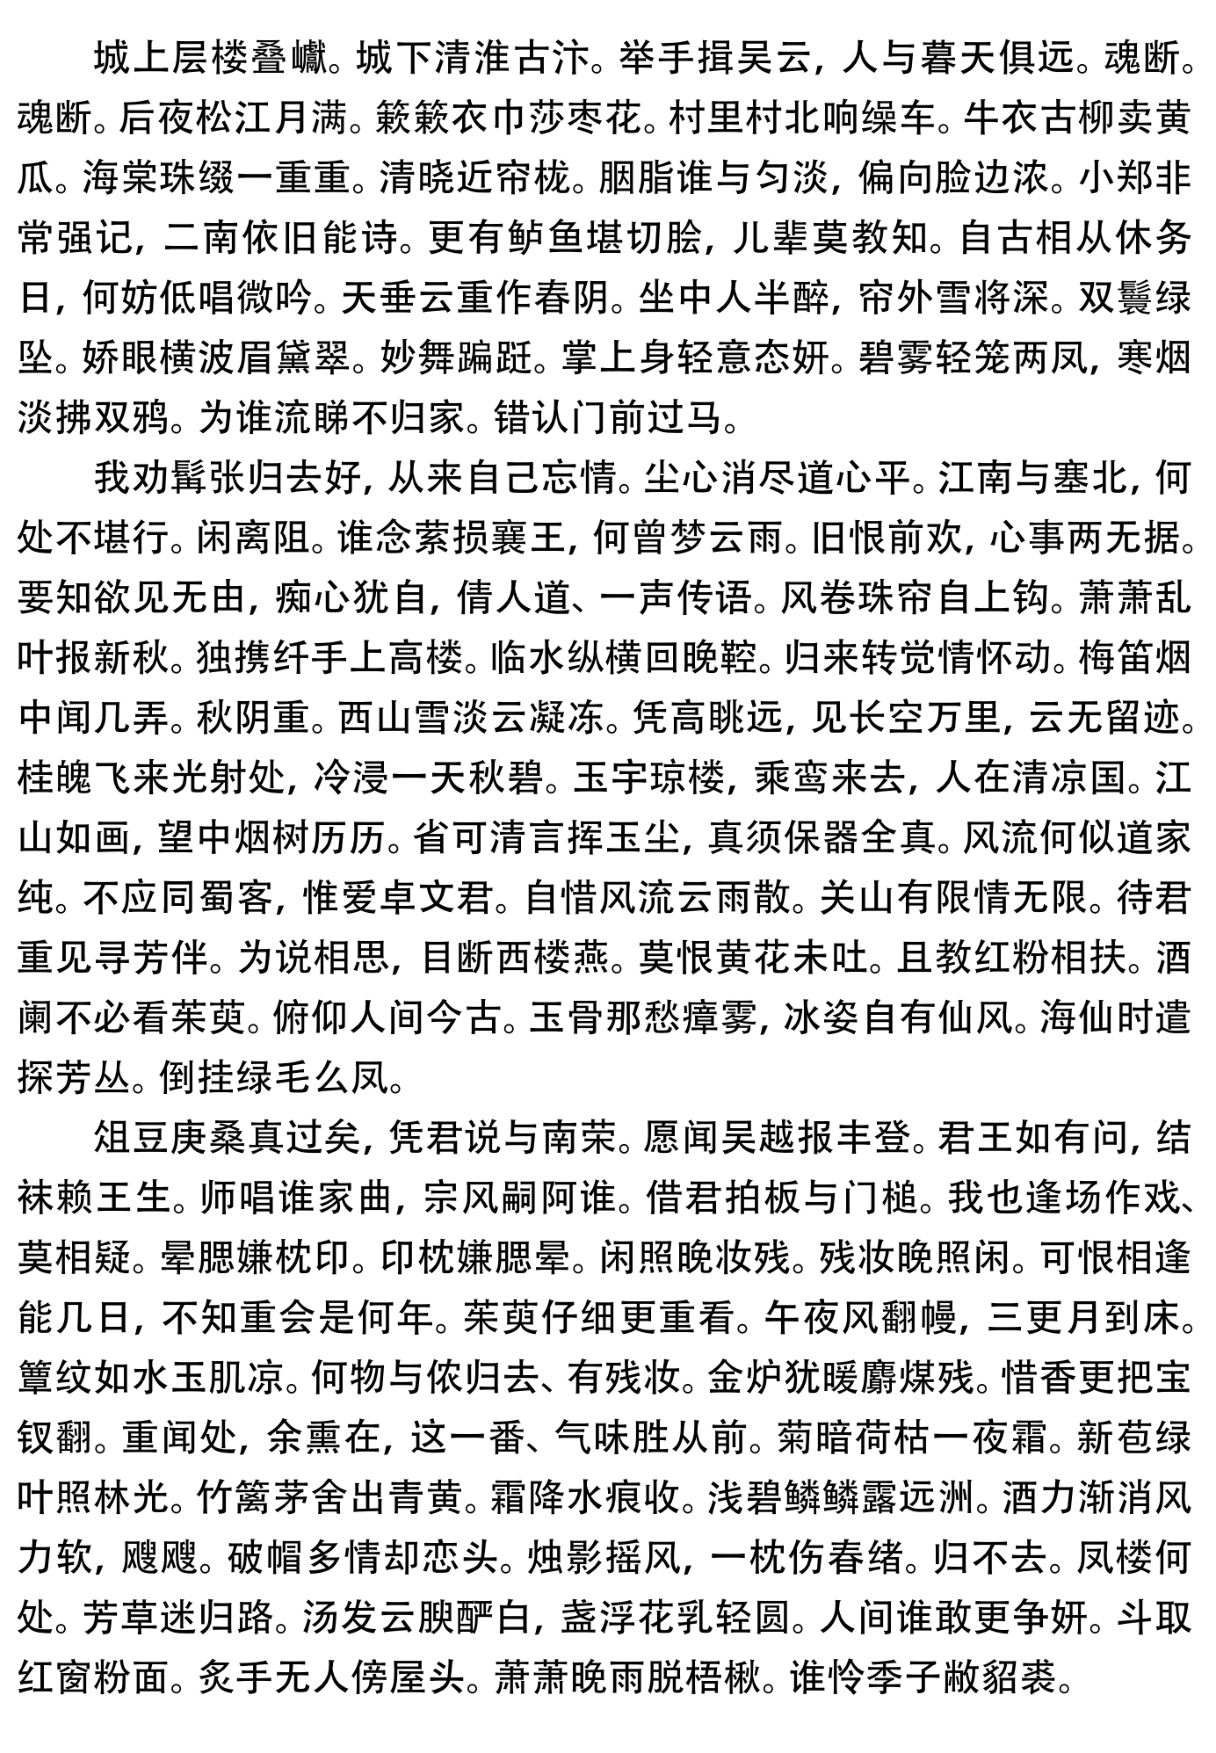

In [ ]:
# 思路一：局部最优模型（贪婪算法）
import os
import numpy as np
import matplotlib.pyplot as plt


def sim(u, v):
    """
    :param u: 图像的二位数组u
    :param v: 图像的二维数组v
    :return: 计算u的最后一列u[:, -1]与v的第一列v[:, 0]的欧氏距离，即差向量的二范数
    """
    return np.linalg.norm(u[:, -1] - v[:, 0])


# 读取图像数据
## Path为存放图像的文件夹的路径
Path = "data\\2013B碎纸片\\附件1"
files = os.listdir(Path)
## file存放所有.bmp的文件名
files = [file for file in files if file[-4:] == '.bmp']

# 图像转图像二维数组，并存于figure中
figures = []
for file in files:
    figures.append(plt.imread(os.path.join(Path, file)))

# 寻找最左边的图像，将序号存于seq1
seq1 = []
for i, mat in enumerate(figures):
    for j in range(np.size(mat, 0)):
        if mat[j][0] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0)-1:
        seq1.append(i)
        break

# seq2为待拼接标号的数组
seq2 = [i for i in range(np.size(figures, 0))]
seq2.remove(seq1[-1])

# 贪婪法开始拼接
while np.size(seq2, 0) != 0:
    # temp1存放所有待拼接数组与seq1[-1]的欧氏距离
    temp1 = []
    for i in seq2:
        temp1.append(sim(figures[seq1[-1]], figures[i]))
    # 将temp1最小值的序号，即最佳匹配图像的序号，添加至seq1
    seq1.extend([seq2[i] for i, x in enumerate(temp1) if x == min(temp1)])
    # 删除seq2中已拼接完成图像的序号
    seq2.remove(seq1[-1])

# 将seq1中序号对应的figure图像从左到右按顺序完成拼接，最终a即为拼接完毕的图像数组
a = np.array(figures[seq1[0]])
for i in range(1, np.size(seq1, 0)):
    a = np.c_[a, np.array(figures[seq1[i]])]


plt.figure(figsize=(24, 32))
plt.imshow(a, cmap='gray')
plt.axis(False)
plt.show()

##### **思路二：优化思路**

记$c_{i, j} = \left\|l_{i}-f_{j}\right\|_2$表示$i$前$j$后相邻情况下产生的相似度，越小相似度越大。\
$x_{i, j} = 1$表示$i$前$j$后且相邻。\
$x_{i, j} = 0$表示$i, j$不相邻。\
**Model：**\
目标函数：$\min \sum_{i = 1}^{19} \sum_{j = 1}^{19} c_{i, j} x_{i, j}$
约束条件：\
（1）总体拼接次数次：$\sum_{i = 1}^{19} \sum_{j = 1}^{19} x_{i, j} = 18$\
（2）除了最后一个碎片，每一个碎纸片后面有且仅有一个碎纸片：$\sum_{j = 1}^{19} x_{i, j}= 1, i = 1,2,\dots,19, i \neq 7$\
（3）除了第一个碎片，每一个碎纸片前面有且仅有一个碎纸片：$\sum_{i = 1}^{19} x_{i, j}= 1, j = 1,2,\dots,19, j \neq 9$

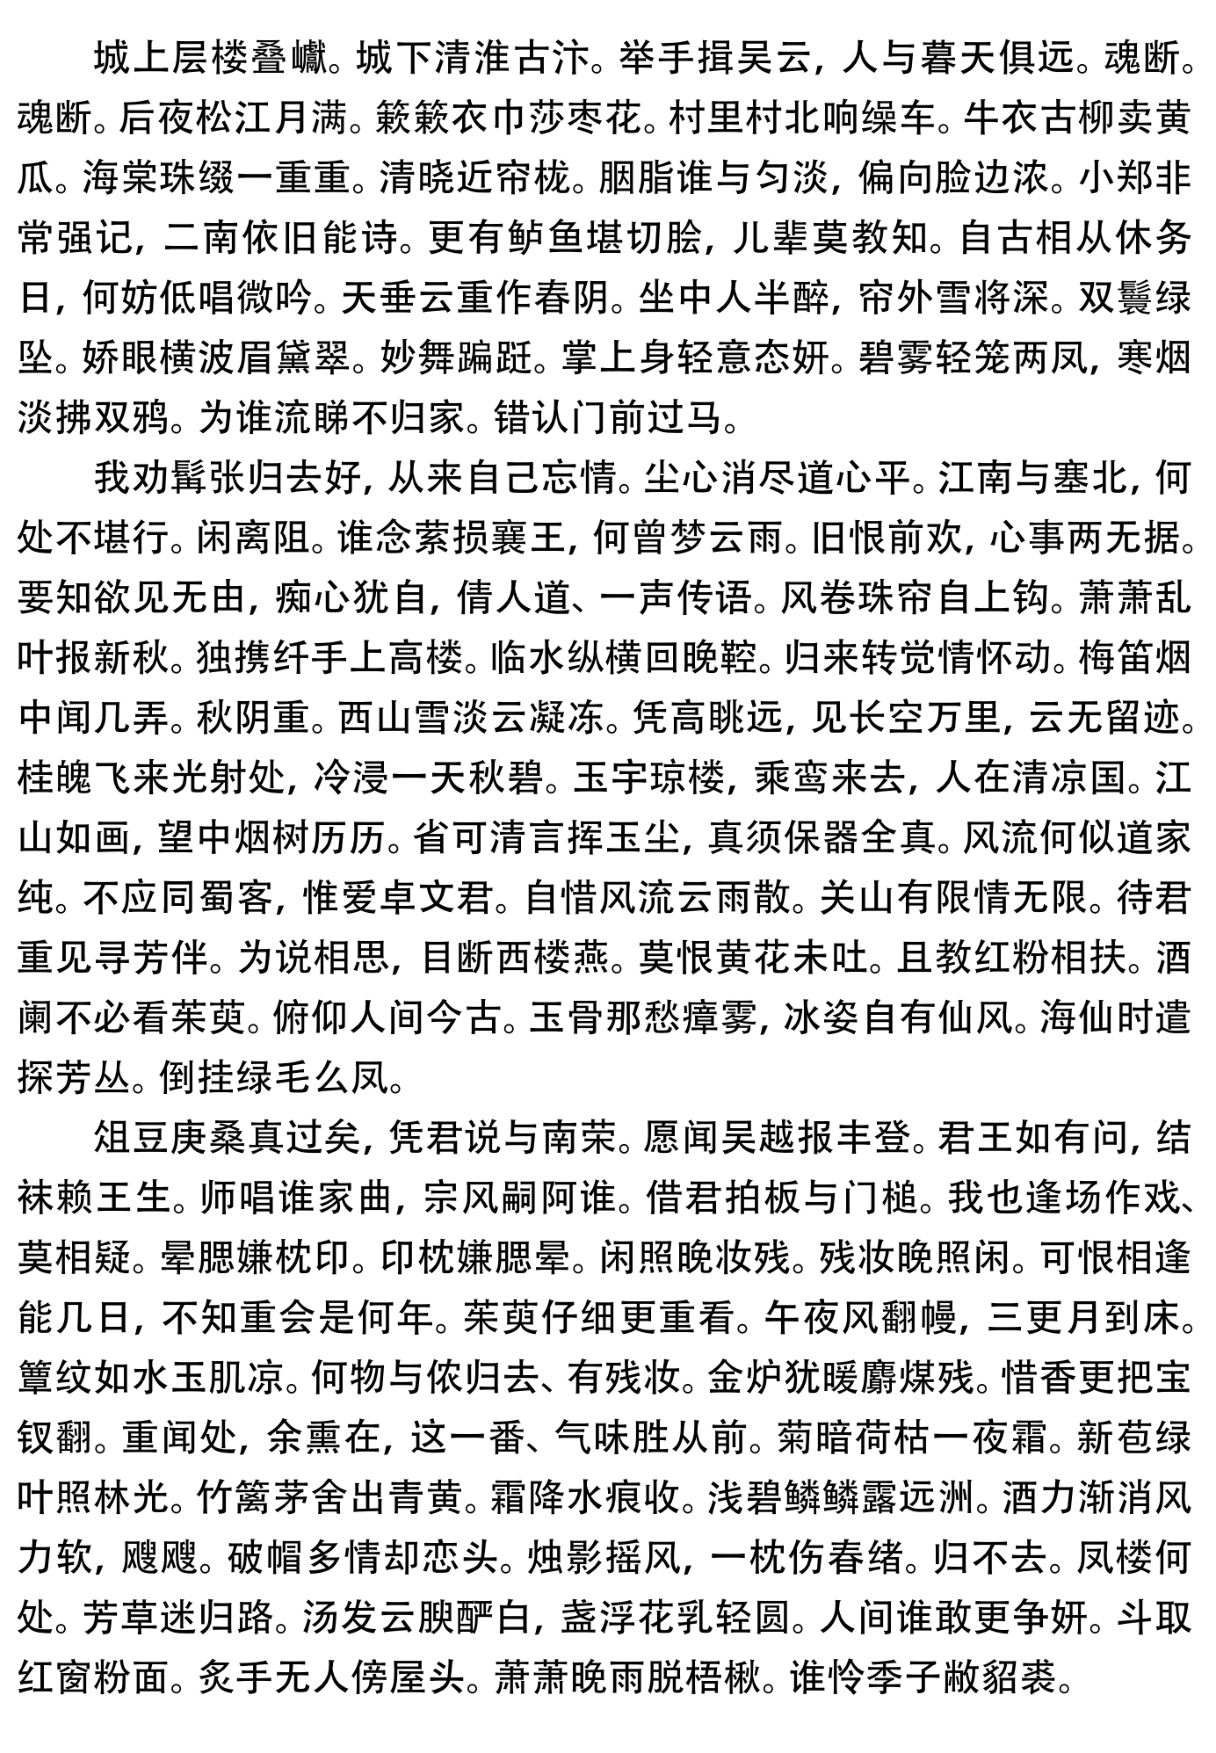

In [ ]:
# 思路二：局部最优模型（优化算法）
import os
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


def similar(u, v):
    """
    :param u: 图像的二维数组u
    :param v: 图像的二维数组v
    :return: 计算u的最后一列u[:, -1]与v的第一列v[:, 0]的欧氏距离，即差向量的二范数
    """
    return np.linalg.norm(u[:, -1].astype(float) - v[:, 0].astype(float))


# %%读取图像数据
# Path为存放图像的文件夹的绝对路径
Path = "data\\2013B碎纸片\\附件1"
files = os.listdir(Path)
# file存放所有.bmp的文件名
files = [file for file in files if file[-4:] == '.bmp']

# 图像转图像二维数组，并存于figure中
figures = []
for file in files:
    figures.append(plt.imread(os.path.join(Path, file)))

# 求图像两两相似度存于数组Similar中
Similar = np.zeros((np.size(figures, 0), np.size(figures, 0)))
for i in range(np.size(figures, 0)):
    for j in range(np.size(figures, 0)):
        if j == i:
            Similar[i, j] = 100000
        else:
            Similar[i, j] = similar(figures[i], figures[j])

# %%寻找最左边的图像，将序号存于first
for i, mat in enumerate(figures):
    j = 0
    for j in range(np.size(mat, 0)):
        if mat[j][0] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0) - 1:
        First = i
        break

# 寻找最左边的图像，将序号存于end
for i, mat in enumerate(figures):
    j = 0
    for j in range(np.size(mat, 0)):
        if mat[j][-1] == 255:
            continue
        else:
            break
    if j == np.size(mat, 0) - 1:
        Last = i
        break

# print(First, Last)
# %%决策变量
x = cp.Variable((np.size(figures, 0), np.size(figures, 0)), boolean=True)

# %%目标函数
obj = cp.Minimize(cp.sum(cp.multiply(Similar, x)))

# %%约束条件
constraints = []
# 1.总体拼接18次
con1 = cp.sum(x) == 18
constraints.append(con1)
# 2.除了最后一个碎片，每一个碎纸片后面有且仅有一个碎纸片：
Size1 = [i for i in range(np.size(figures, 0))]
Size1.remove(Last)
for i in Size1:
    con2 = cp.sum(x[i, :]) == 1
    constraints.append(con2)

# 3.除了第一个碎片，每一个碎纸片前面有且仅有一个碎纸片：
Size2 = [i for i in range(np.size(figures, 0))]
Size2.remove(First)
for j in Size2:
    con3 = cp.sum(x[:, j]) == 1
    constraints.append(con3)

# %%构建并求解模型
prob = cp.Problem(obj, constraints)
prob.solve()

# %%碎纸片拼接排序方法1（繁琐）
# I = np.array([])
# J = np.array([])
# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#         if x.value[i, j] > 0:
#             # print("x[{}][{}]={}".format(i, j, x.value[i, j]))
#             I = np.append(I, i)
#             J = np.append(J, j)
# I = I.astype(int)
# J = J.astype(int)
# sorted_ind = np.array([First])
# temp = [1]
# while np.size(temp) != 0:
#     temp = np.where(I == seq[-1])
#     sorted_ind = np.append(sorted_ind, J[temp[0]])
# %%碎纸片拼接排序方法2（简洁）
sorted_ind = [First]
while len(sorted_ind) < len(figures):
    for j in range(len(figures)):
        if x.value[sorted_ind[-1]][j] > 0:
            sorted_ind.append(j)
# print(sorted_ind)
# %%将seq中序号对应的figure图像从左到右按顺序完成拼接，最终a即为拼接完毕的图像数组
a = np.array(figures[sorted_ind[0]])
for i in range(1, np.size(sorted_ind, 0)):
    a = np.c_[a, np.array(figures[sorted_ind[i]])]

plt.figure(figsize=(24, 32))
plt.imshow(a, cmap='gray')
plt.axis(False)
plt.show()

#### 2.4.3 二次指派问题

（数学模型第五版 姜启源 4.4接力队的选拔与选课策略复习题）某公司指派$n$个员工到$n$个城市工作（每个城市单独一人），希望使所花费的总电话费用尽可能少。$n$个员工两两之间每个月通话的时间表示在下面的矩阵的上三角形部分（假设通话的时间矩阵是对称的，没有必要写出下三角形部分），$n$个城市两两之间通话费率表示在下面的矩阵的下三角形部分（同样道理，假设通话的费率矩阵是对称的，没有必要写出上三角形部分）。试求解该二次指派问题。（如果你的软件解不了这么大规模的问题，那就只考虑最前面的若干员工和城市。）
$$
\left(\begin{array}{cccccccccc}
0 & 5 & 3 & 7 & 9 & 3 & 9 & 2 & 9 & 0 \\
7 & 0 & 7 & 8 & 3 & 2 & 3 & 3 & 5 & 7 \\
4 & 8 & 0 & 9 & 3 & 5 & 3 & 3 & 9 & 3 \\
6 & 2 & 10 & 0 & 8 & 4 & 1 & 8 & 0 & 4 \\
8 & 6 & 4 & 6 & 0 & 8 & 8 & 7 & 5 & 9 \\
8 & 5 & 4 & 6 & 6 & 0 & 4 & 8 & 0 & 3 \\
8 & 6 & 7 & 9 & 4 & 3 & 0 & 7 & 9 & 5 \\
6 & 8 & 2 & 3 & 8 & 8 & 6 & 0 & 5 & 5 \\
6 & 3 & 6 & 2 & 8 & 3 & 7 & 8 & 0 & 5 \\
5 & 6 & 7 & 6 & 6 & 2 & 8 & 8 & 9 & 0
\end{array}\right)
$$

**解** 记$p$为通话时间矩阵；$q$为通话费率矩阵。$x_{ij}=1$，若员工$i$分配到城市$j$，否则，$x_{ij}=0$。
数学模型如下：
$$
\begin{array}{ll}
\min z = \frac{1}{2} \sum_{i=1}^{10} \sum_{j=1}^{10} \sum_{m=1}^{10} \sum_{n=1}^{10} p_{ij} q_{ij} x_{im} x_{jn}\\
\text{s.t.}
\begin{cases}
\sum_{i=1}^{10} x_{ij}=1, j=1,2,\dots,10\\
\sum_{j=1}^{10} x_{ij}=1, i=1,2,\dots,10\\
x_{ij} \in \{0, 1\}
\end{cases}
\end{array}
$$

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

p = np.array([
    [0, 5, 3, 7, 9, 3, 9, 2, 9, 0],
    [5, 0, 7, 8, 3, 2, 3, 3, 5, 7],
    [3, 7, 0, 9, 3, 5, 3, 3, 9, 3],
    [7, 8, 9, 0, 8, 4, 1, 8, 0, 4],
    [9, 3, 3, 8, 0, 8, 8, 7, 5, 9],
    [3, 2, 5, 4, 8, 0, 4, 8, 0, 3],
    [9, 3, 3, 1, 8, 4, 0, 7, 9, 5],
    [2, 3, 3, 8, 7, 8, 7, 0, 5, 5],
    [9, 5, 9, 0, 5, 0, 9, 5, 0, 5],
    [0, 7, 3, 4, 9, 3, 5, 5, 5, 0]
])
q = np.array([
    [0, 7, 4, 6, 8, 8, 8, 6, 6, 5],
    [7, 0, 8, 2, 6, 5, 6, 8, 3, 6],
    [4, 8, 0, 10,4, 4, 7, 2, 6, 7],
    [6, 2, 10, 0,6, 6, 9, 3, 2, 6],
    [8, 6, 4, 6, 0, 6, 4, 8, 8, 6],
    [8, 5, 4, 6, 6, 0, 3, 8, 3, 2],
    [8, 6, 7, 9, 4, 3, 0, 6, 7, 8],
    [6, 8, 2, 3, 8, 8, 6, 0, 8, 8],
    [6, 3, 6, 2, 8, 3, 7, 8, 0, 9],
    [5, 6, 7, 6, 6, 2, 8, 8, 9, 0]
])

model = gp.Model()

index = [(i, j) for i in range(1, 10+1) for j in range(1, 10+1)]
x = model.addVars(index, vtype=GRB.BINARY, name='x')

obj = 0
for i in range(1, 10+1):
    for j in range(1, 10+1):
        for m in range(1, 10+1):
            for n in range(1, 10+1):
                obj += p[i-1, j-1] * q[m-1, n-1] * x[m, i] * x[n, j]

model.setObjective(0.5*obj, GRB.MINIMIZE)

model.addConstrs(x.sum(i, '*') == 1 for i in range(1, 10+1))
model.addConstrs(x.sum('*', j) == 1 for j in range(1, 10+1))

model.optimize()

print("最小费用为：", model.objVal)
print("分配方案如下：")
for i in range(1, 10+1):
    for j in range(1, 10+1):
            if x[i, j].x != 0:
                print("员工{}到城市{}".format(i, j))

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 20 rows, 100 columns and 200 nonzeros
Model fingerprint: 0x5156436e
Model has 3780 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [4e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1390.0000000
Presolve time: 0.01s
Presolved: 20 rows, 100 columns, 200 nonzeros
Presolved model has 3880 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)

Root relaxation: objective -3.181574e+03, 120 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0           

## 3.Sudoku求解

涉及到三个集合之间的关系的优化问题，我们称之为ABC型优化。

**数独问题**

所谓标准数独, 就是用$9\times 9$的方阵构成81个格子, 其中9个用粗线分隔的区域称为宫, 在其中的一些格子里已经填上了1到 9之间的数字, 还留下若干空格, 要求数独参与者将这些格子填满, 结果满足每一行、每一列、每个宫的9个数字都是由1到9组成, 没有重复数字。数独联盟将标准数独进行变形, 推出多种变形数独。数独游戏全面考验做题者的观察能力和推理能力, 虽然玩法简单, 但数字排列方式却千变万化, 所以不少教育者认为数独游戏是训练头脑的绝佳方式。

### 模型建立

$x_{i,j,k} = 1$, 表示在(i,j)位置上放置数k

$x_{i,j,k} = 0$, 表示在(i,j)位置上不放置数k

目标函数: min = $ \sum_{i=1..9} \sum_{j=1..9} \sum_{k=1..9} x_{i,j,k}$

约束条件：

（1）第i行数k只出现一次

$\sum_{j=1..9} x_{i,j,k} = 1, i,k=1..9$

（2）第i列数k只出现一次

$ \sum_{i=1..9} x_{i,j,k} = 1, j,k = 1..9$

（3）第i列数k只出现一次

$ \sum_{i=1..9} x_{i,j,k} = 1, i,j=1..9$

（4）$i,j =  1,2,3 $ 范围内k只出现一次

$\sum_{i=1}^3 \sum_{j=1}^3 x_{i+m, j+n, k}=1,m,n=0,3,6,k=1,\dots,9$

(5) $x_{i,j,k} = 0,1$

即:
$$
\begin{array}{ll}
\min &\sum_{i=1..9} \sum_{j=1..9} \sum_{k=1..9} x_{i,j,k}, \\
\text { s.t. } & \left\{\begin{array}{l}
\sum_{j=1}^9 x_{ijk}=1, i,k=1,\dots,9 \\
\sum_{i=1}^9 x_{ijk}=1, j,k=1,\dots,9\\
\sum_{k=1}^9 x_{ijk}=1, i,j=1,\dots,9\\
\sum_{i=1}^3 \sum_{j=1}^3 x_{i+m, j+n, k}=1,m,n=0,3,6,k=1,\dots,9\\
x_{ijk}=0 \text{ or } 1,i,j=1,\dots,9
\end{array}\right.
\end{array}
$$

In [ ]:
# 由于cvxpy不支持三维变量, 故采用gurobipy. 详见第十四章.

import gurobipy as gp
from gurobipy import GRB
import numpy as np

data = np.loadtxt('data/sudoku_example.txt')
print(data)

model = gp.Model()

index = [(i, j, k) for i in range(1, 10) for j in range(1, 10) for k in range(1, 10)]
x = model.addVars(index, vtype=GRB.BINARY, name='x')

for i in range(1, 10):
    for j in range(1, 10):
        if data[i - 1][j - 1] != 0:
            model.addConstr(x[i, j, data[i - 1][j - 1]] == 1)

model.addConstrs(x.sum(i, '*', k) == 1 for i in range(1, 10) for k in range(1, 10))
model.addConstrs(x.sum('*', j, k) == 1 for j in range(1, 10) for k in range(1, 10))
model.addConstrs(x.sum(i, j, '*') == 1 for i in range(1, 10) for j in range(1, 10))
for k in range(1, 10):
    for m in [0, 3, 6]:
        for n in [0, 3, 6]:
            SUM = 0
            for i in [1, 2, 3]:
                for j in [1, 2, 3]:
                    SUM += x[i+m, j+m, k]
            model.addConstr(SUM == 1)

model.optimize()

for i in range(1, 10):
    for j in range(1, 10):
        for k in range(1, 10):
            if x[i, j, k].x != 0:
                break
        print(k, end=' ')
    print()

[[0. 6. 0. 0. 0. 0. 1. 0. 8.]
 [0. 0. 0. 1. 0. 6. 0. 0. 4.]
 [0. 9. 4. 0. 2. 0. 0. 7. 0.]
 [0. 0. 0. 3. 0. 7. 4. 0. 0.]
 [0. 5. 0. 0. 0. 4. 0. 6. 2.]
 [4. 0. 7. 0. 9. 0. 0. 8. 0.]
 [6. 0. 9. 0. 0. 0. 0. 4. 1.]
 [3. 0. 0. 4. 8. 0. 2. 0. 0.]
 [0. 4. 0. 0. 6. 0. 5. 0. 0.]]
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 356 rows, 729 columns and 2948 nonzeros
Model fingerprint: 0x6ef69f91
Variable types: 0 continuous, 729 integer (729 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 356 rows and 729 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-0